# Importing all necessary libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [157]:
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.svm import SVC, SVR

from sklearn.multiclass import OneVsRestClassifier

from catboost import CatBoostRegressor
from catboost import CatBoostClassifier

# Load and check data

In [81]:
red_wine_quality = pd.read_csv('data/winequality-red.csv', sep=';')

In [82]:
red_wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [83]:
red_wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [84]:
red_wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Checking for unwanted objects by type: "?, 0"

In [85]:
for col in red_wine_quality.columns:
    print('{} : {}'.format(col,red_wine_quality[col].unique()))

fixed acidity : [ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]
volatile acidity : [0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44  0.635 0.82  0.48  1.    0.21  0

# Data visualisation

In [127]:
red_wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: >

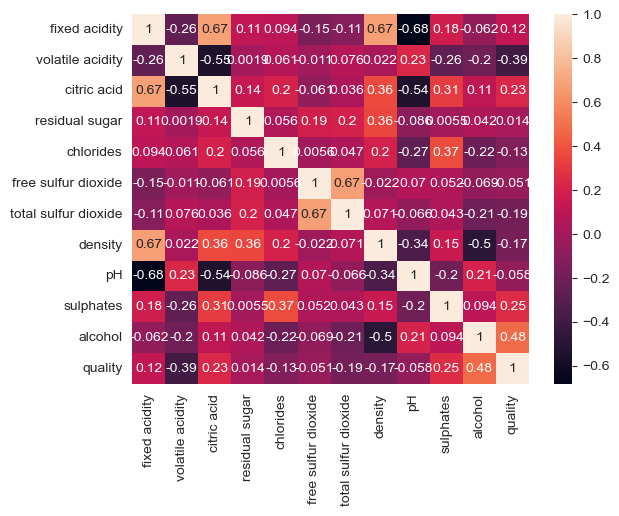

In [86]:
sns.heatmap(red_wine_quality.corr(), annot=True)

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

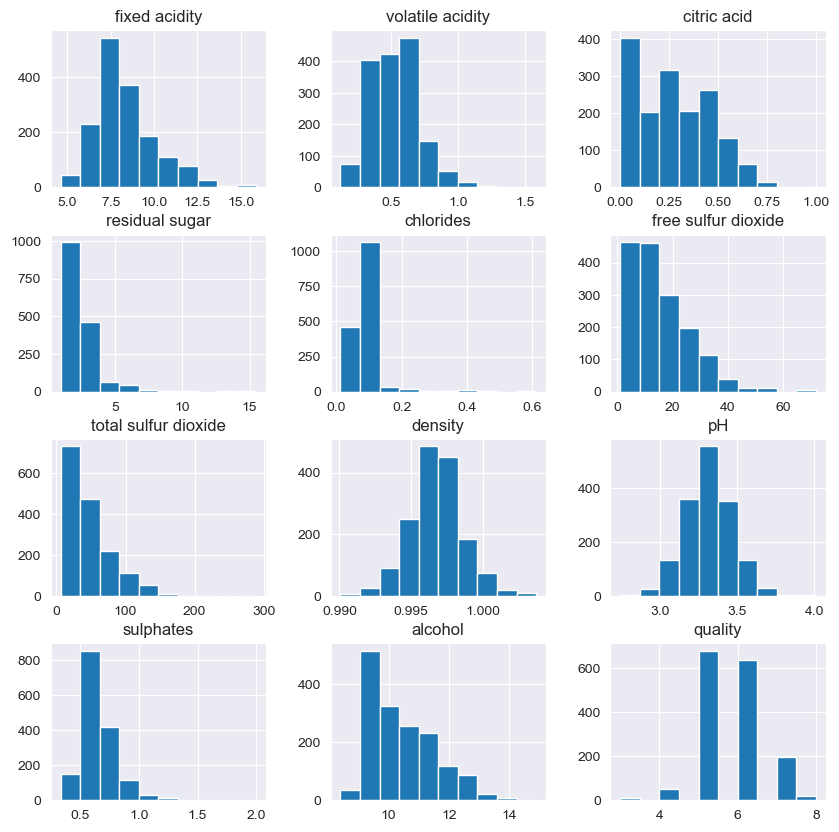

In [87]:
red_wine_quality.hist(figsize=(10, 10))

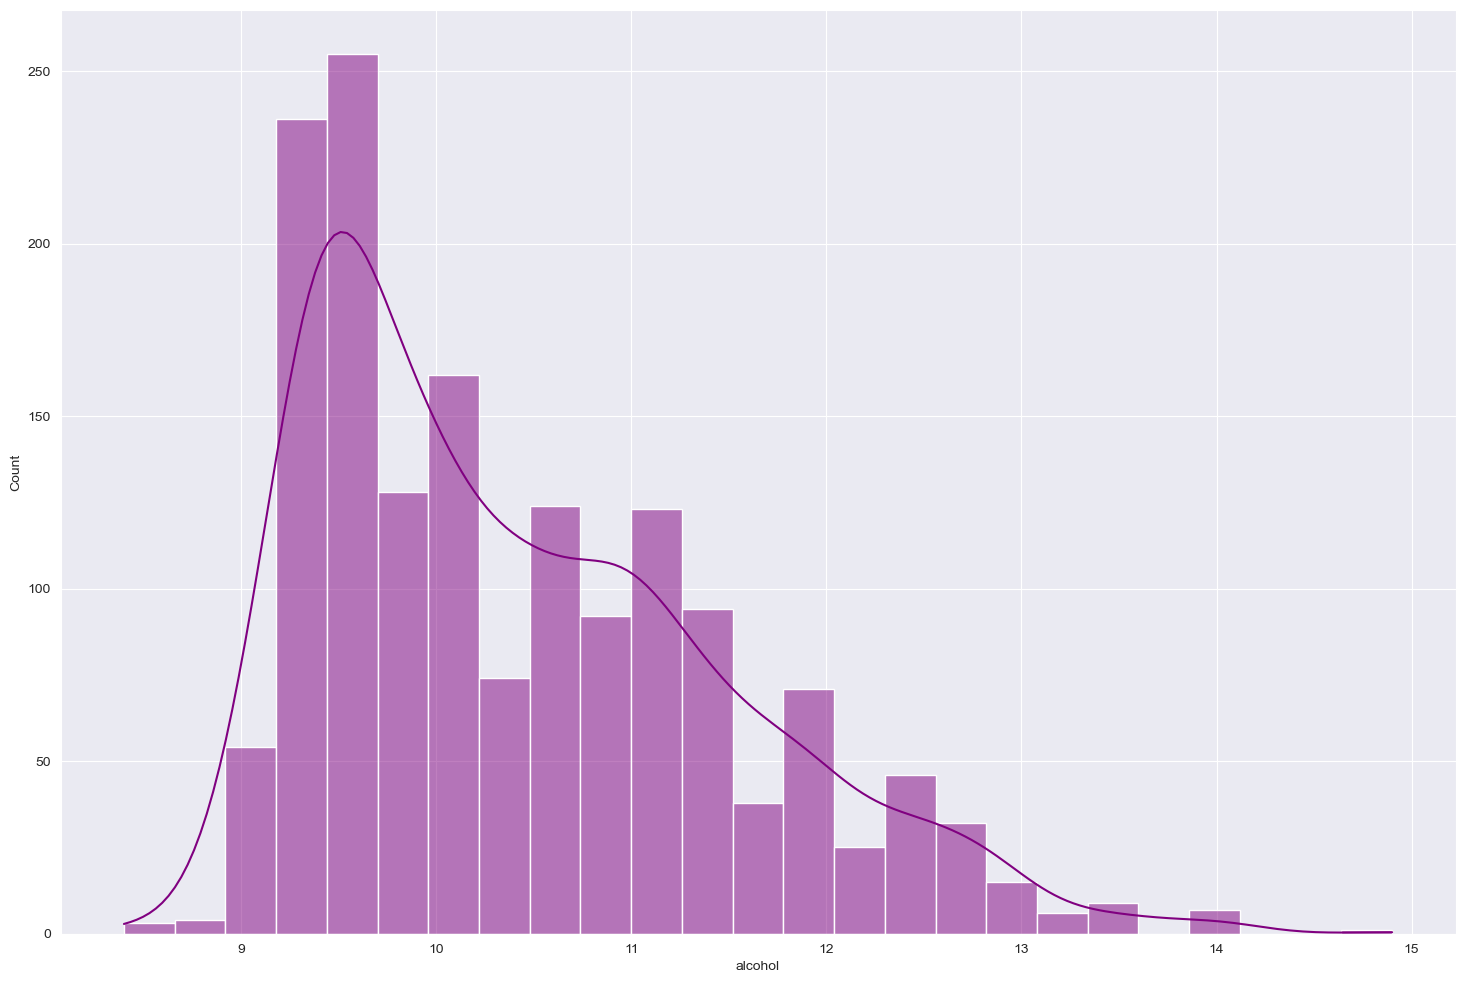

In [128]:
ax = plt.subplots(figsize = (18,12))
ax = sns.histplot(x = red_wine_quality['alcohol'], bins = 25, color = 'purple', kde = True)

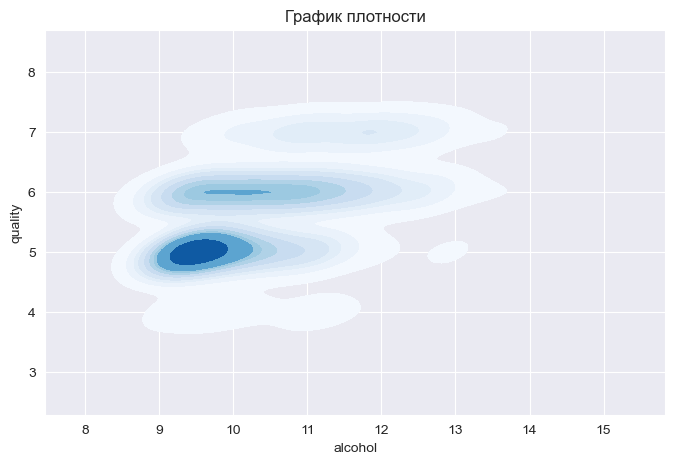

In [89]:
plt.figure(figsize=(8, 5))
sns.kdeplot(x=red_wine_quality["alcohol"], y=red_wine_quality["quality"], cmap="Blues", fill=True)
plt.title("График плотности")
plt.show()


<Figure size 1200x800 with 0 Axes>

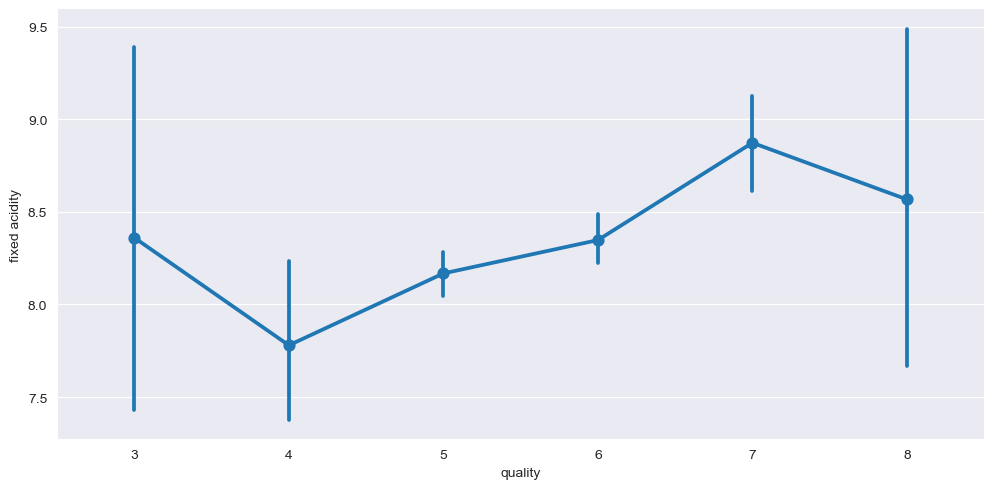

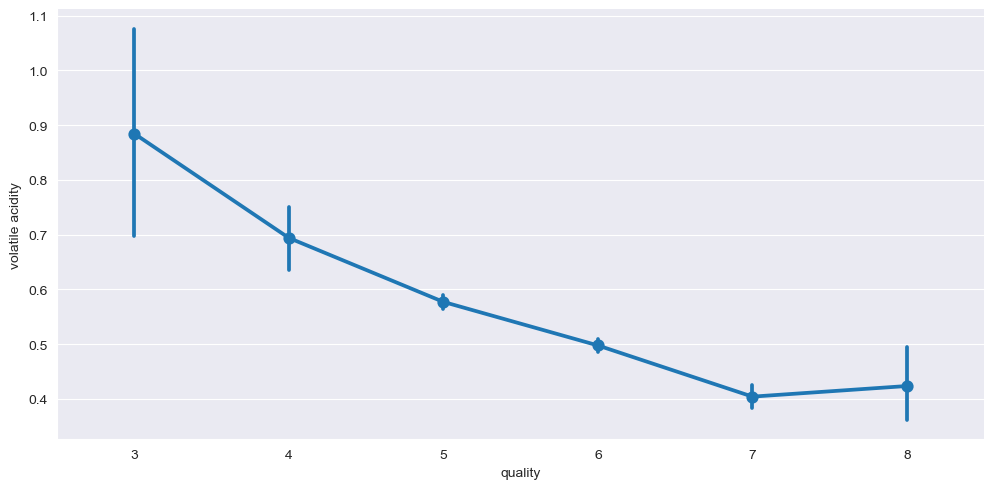

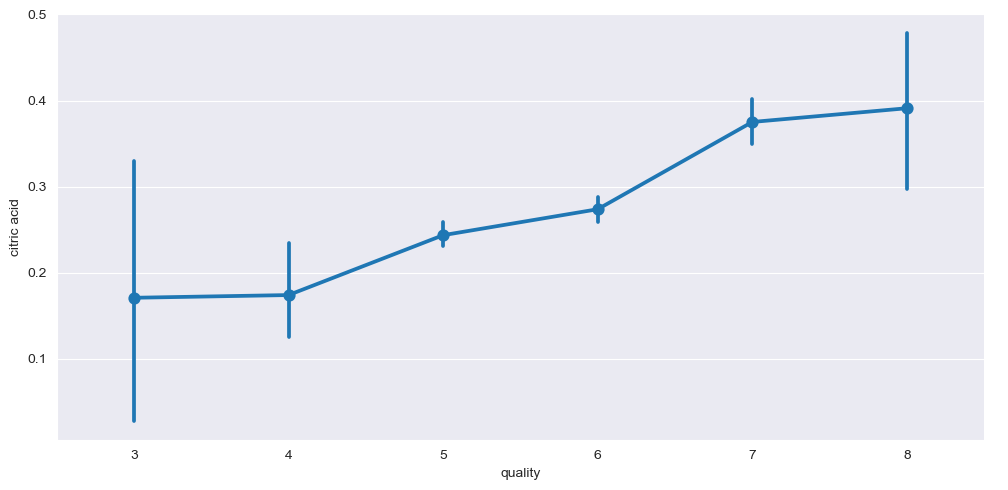

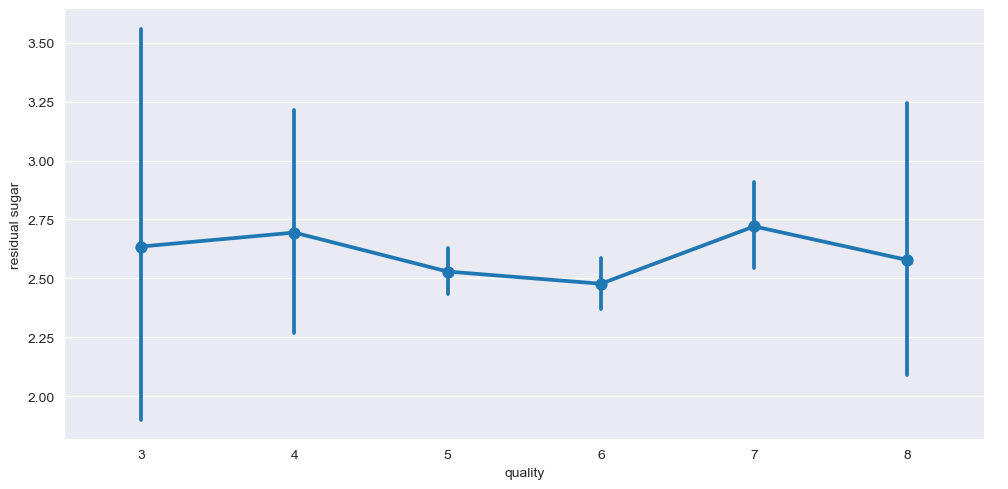

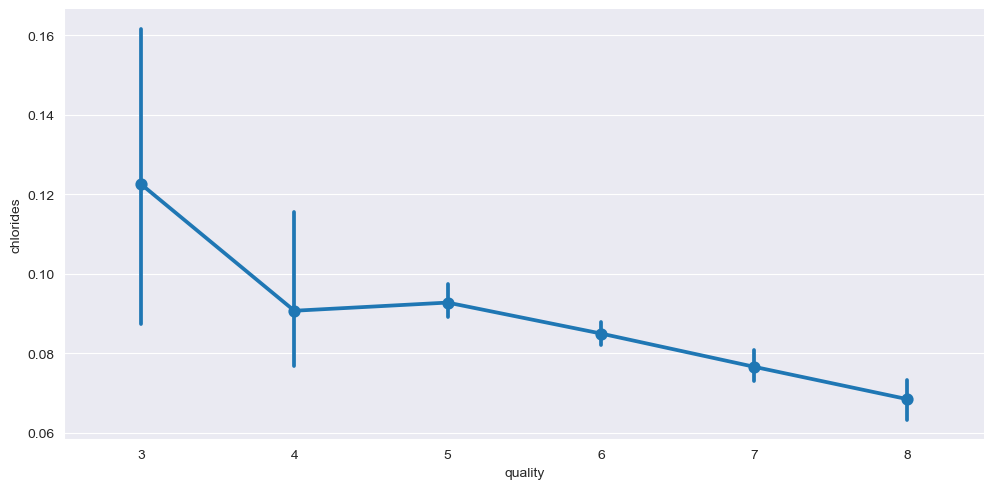

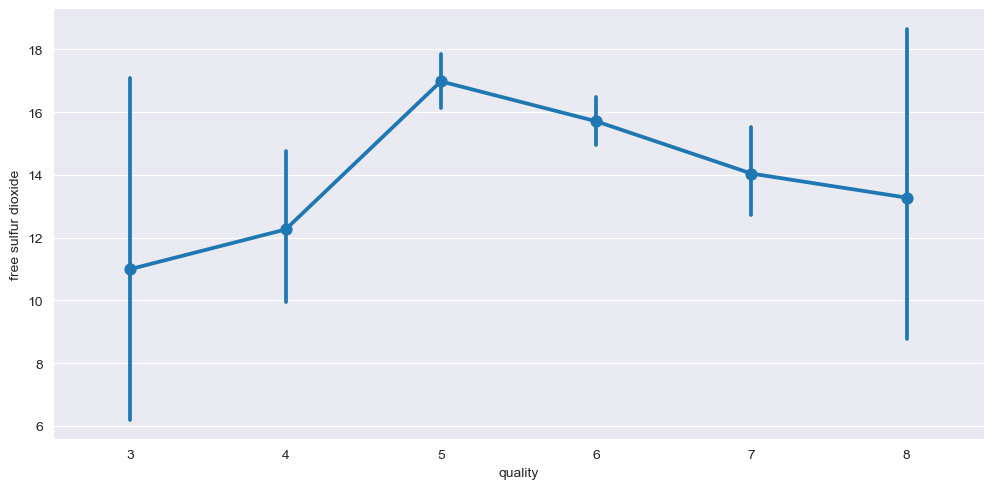

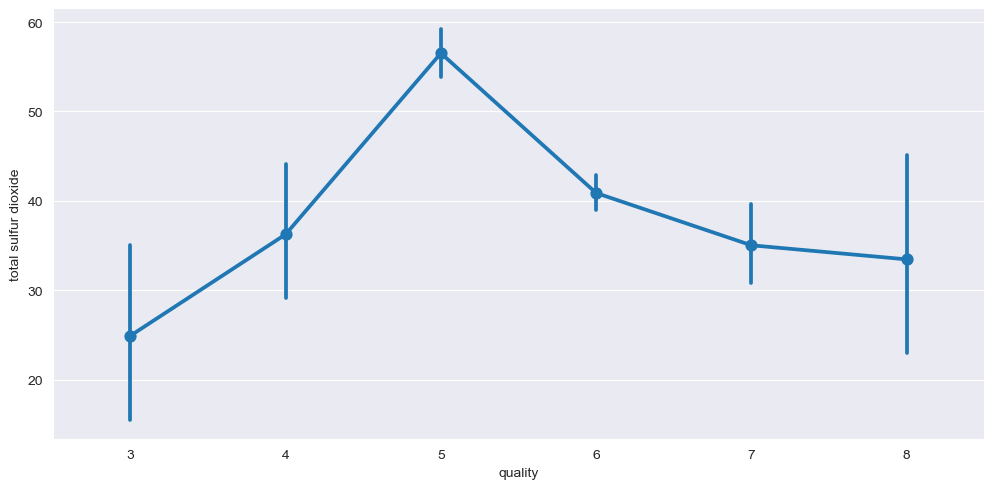

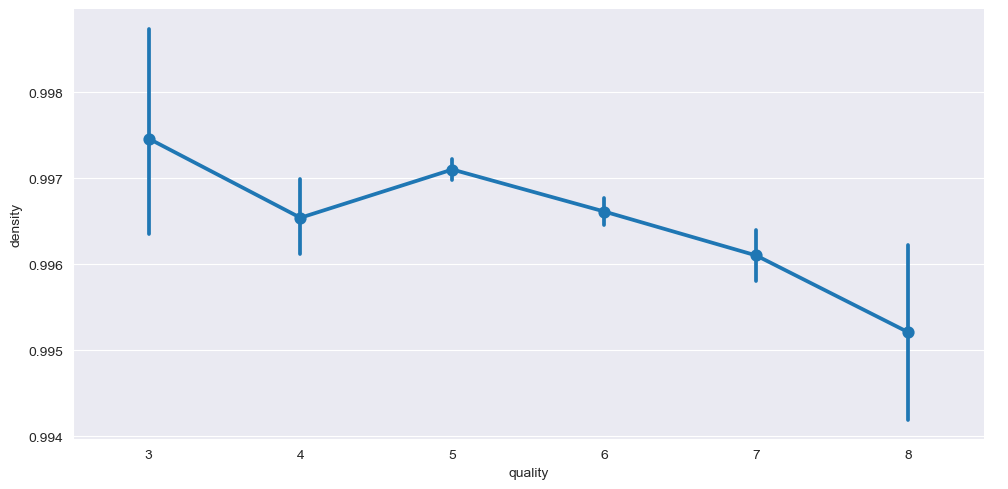

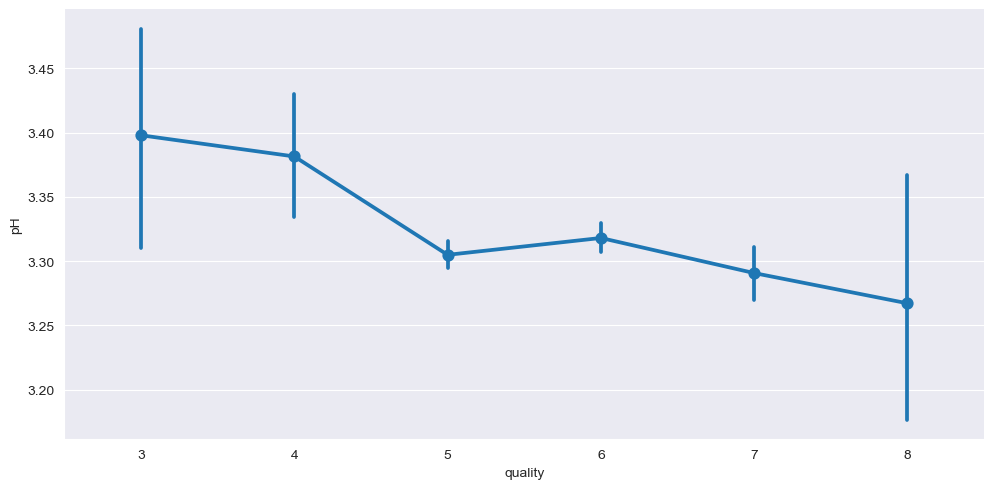

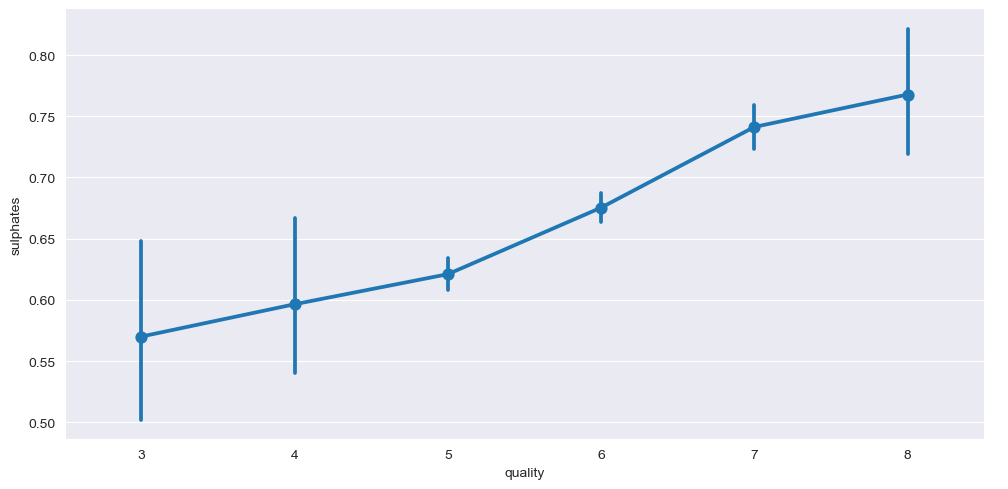

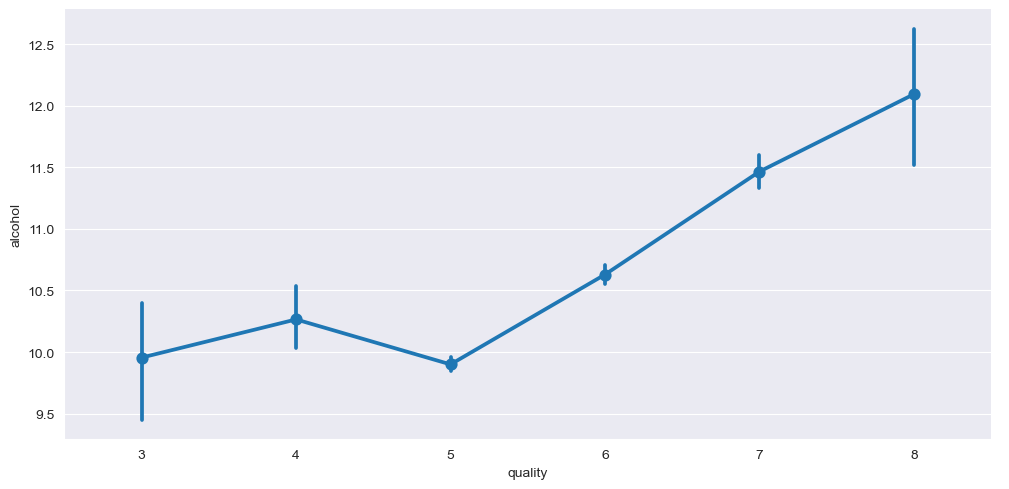

In [146]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(red_wine_quality.columns[:-1]):
    sns.catplot(data = red_wine_quality, y=col, x="quality", kind='point', aspect=2)

plt.tight_layout()
plt.show()

<Axes: xlabel='chlorides', ylabel='fixed acidity'>

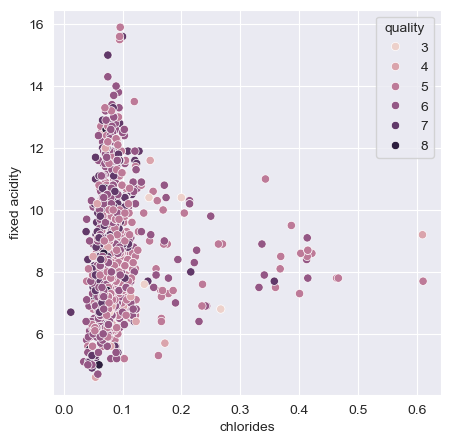

In [90]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x = red_wine_quality["chlorides"], y = red_wine_quality["fixed acidity"], hue = red_wine_quality["quality"])

<Axes: xlabel='density', ylabel='residual sugar'>

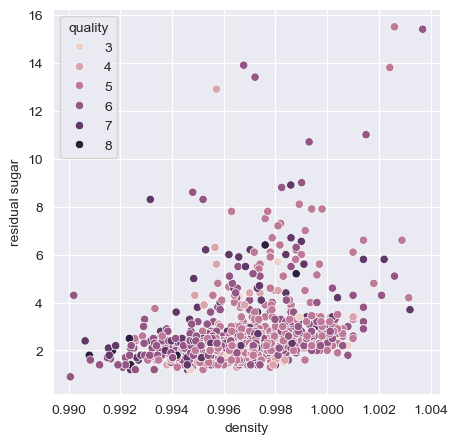

In [91]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x = red_wine_quality["density"], y = red_wine_quality["residual sugar"], hue = red_wine_quality["quality"])


In [92]:
red_wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Preparing data

In [93]:
y_data = red_wine_quality[['quality']]

In [94]:
X_data = red_wine_quality.drop('quality', axis = 1)

In [95]:
X_data, y_data = X_data.sample(frac = 1, replace = True), y_data.sample(frac = 1, replace = True)

In [97]:
def split_and_normalize_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y_data)
    scaler = StandardScaler()

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

# Different models testing

In [98]:
X_train, X_test, y_train, y_test = split_and_normalize_data(X_data, y_data)

regressor = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

grid_search = GridSearchCV(regressor, param_grid, n_jobs = -1, cv = 5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='r2')

In [99]:
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший R² на кросс-валидации:", grid_search.best_score_)

Лучшие параметры: {'copy_X': True, 'fit_intercept': True}
Лучший R² на кросс-валидации: -0.015802475991592214


In [100]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [104]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"R² (коэффициент детерминации): {r2:.4f}")
print(f"MAE (средняя абсолютная ошибка): {mae:.4f}")
print(f"MSE (среднеквадратичная ошибка): {mse:.4f}")
print(f"RMSE (корень из MSE): {np.sqrt(rmse):.4f}")

R² (коэффициент детерминации): 0.0020
MAE (средняя абсолютная ошибка): 0.6862
MSE (среднеквадратичная ошибка): 0.6771
RMSE (корень из MSE): 0.8228


In [105]:
X_train, X_test, y_train, y_test = split_and_normalize_data(X_data, y_data)

tree_regressor = DecisionTreeRegressor()

param_grid = {
    "criterion":('squared_error', 'friedman_mse', 'poisson', 'absolute_error'),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}

grid_search = GridSearchCV(tree_regressor, param_grid, n_jobs = -1, cv = 5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ('squared_error', 'friedman_mse',
                                       'poisson', 'absolute_error'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='r2')

In [106]:
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший R² на кросс-валидации:", grid_search.best_score_)

Лучшие параметры: {'criterion': 'friedman_mse', 'max_depth': 1, 'min_samples_leaf': 16, 'min_samples_split': 4, 'splitter': 'random'}
Лучший R² на кросс-валидации: -0.012561628018349636


In [107]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [108]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"R² (коэффициент детерминации): {r2:.4f}")
print(f"MAE (средняя абсолютная ошибка): {mae:.4f}")
print(f"MSE (среднеквадратичная ошибка): {mse:.4f}")
print(f"RMSE (корень из MSE): {np.sqrt(rmse):.4f}")

R² (коэффициент детерминации): -0.0146
MAE (средняя абсолютная ошибка): 0.6907
MSE (среднеквадратичная ошибка): 0.6883
RMSE (корень из MSE): 0.8296


In [109]:
X_train, X_test, y_train, y_test = split_and_normalize_data(X_data, y_data)

random_forest_regressor = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(random_forest_regressor, param_grid, n_jobs = -1, cv = 5, scoring='r2')
grid_search.fit(X_train, y_train)

C:\Users\gosha\miniconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [110]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [111]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"R² (коэффициент детерминации): {r2:.4f}")
print(f"MAE (средняя абсолютная ошибка): {mae:.4f}")
print(f"MSE (среднеквадратичная ошибка): {mse:.4f}")
print(f"RMSE (корень из MSE): {np.sqrt(rmse):.4f}")

R² (коэффициент детерминации): -0.0123
MAE (средняя абсолютная ошибка): 0.6907
MSE (среднеквадратичная ошибка): 0.6867
RMSE (корень из MSE): 0.8287


C:\Users\gosha\miniconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [113]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [114]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"R² (коэффициент детерминации): {r2:.4f}")
print(f"MAE (средняя абсолютная ошибка): {mae:.4f}")
print(f"MSE (среднеквадратичная ошибка): {mse:.4f}")
print(f"RMSE (корень из MSE): {np.sqrt(rmse):.4f}")

R² (коэффициент детерминации): -0.0388
MAE (средняя абсолютная ошибка): 0.6982
MSE (среднеквадратичная ошибка): 0.7047
RMSE (корень из MSE): 0.8395


In [181]:
X_train, X_test, y_train, y_test = split_and_normalize_data(X_data, y_data)

ovr = OneVsRestClassifier(
    CatBoostClassifier(
        iterations = 500,
        objective = 'MultiClassOneVsAll',
        l2_leaf_reg = 5,
        random_seed = 52,
        thread_count = 1,
        verbose = 0,
        learning_rate = 0.01,
        depth = 8
    )
)

ovr.fit(X_train, y_train)

OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x00000254ACBC60C0>)

In [182]:
y_pred = ovr.predict(X_test)

In [183]:
rfc_score = accuracy_score(y_test, y_pred)

print(f"точность: {rfc_score:.4f}")

точность: 0.4406


In [118]:
X_train, X_test, y_train, y_test = split_and_normalize_data(X_data, y_data)

catboost_regressor = CatBoostRegressor()

param_grid = {
    'iterations': [200, 500],
    'learning_rate': [0.01, 0.05, 0.1], # Скорость обучения
    'depth': [4, 6, 8],                 # Глубина деревьев
    'l2_leaf_reg': [1, 3, 5],           # L2-регуляризация
    'border_count': [32, 64, 128],      # Количество разбиений для категориальных признаков
}

grid_search = GridSearchCV(catboost_regressor, param_grid, n_jobs = -1, cv = 5, scoring='r2')
grid_search.fit(X_train, y_train)

0:	learn: 0.8280189	total: 672us	remaining: 134ms
1:	learn: 0.8278671	total: 1.4ms	remaining: 139ms
2:	learn: 0.8276904	total: 1.89ms	remaining: 124ms
3:	learn: 0.8275106	total: 2.4ms	remaining: 118ms
4:	learn: 0.8273815	total: 2.88ms	remaining: 112ms
5:	learn: 0.8271950	total: 3.38ms	remaining: 109ms
6:	learn: 0.8268574	total: 3.89ms	remaining: 107ms
7:	learn: 0.8266441	total: 4.39ms	remaining: 105ms
8:	learn: 0.8264005	total: 4.91ms	remaining: 104ms
9:	learn: 0.8261486	total: 5.43ms	remaining: 103ms
10:	learn: 0.8259872	total: 5.96ms	remaining: 102ms
11:	learn: 0.8256665	total: 6.56ms	remaining: 103ms
12:	learn: 0.8254590	total: 7.13ms	remaining: 103ms
13:	learn: 0.8252781	total: 7.64ms	remaining: 102ms
14:	learn: 0.8251457	total: 8.16ms	remaining: 101ms
15:	learn: 0.8248762	total: 8.66ms	remaining: 99.6ms
16:	learn: 0.8248061	total: 9.14ms	remaining: 98.4ms
17:	learn: 0.8245401	total: 9.62ms	remaining: 97.3ms
18:	learn: 0.8243334	total: 10.1ms	remaining: 96.5ms
19:	learn: 0.8240681	

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002548329D400>,
             n_jobs=-1,
             param_grid={'border_count': [32, 64, 128], 'depth': [4, 6, 8],
                         'iterations': [200, 500], 'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='r2')

In [119]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [120]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"R² (коэффициент детерминации): {r2:.4f}")
print(f"MAE (средняя абсолютная ошибка): {mae:.4f}")
print(f"MSE (среднеквадратичная ошибка): {mse:.4f}")
print(f"RMSE (корень из MSE): {np.sqrt(rmse):.4f}")

R² (коэффициент детерминации): -0.0164
MAE (средняя абсолютная ошибка): 0.6924
MSE (среднеквадратичная ошибка): 0.6895
RMSE (корень из MSE): 0.8304


In [175]:
X_train, X_test, y_train, y_test = split_and_normalize_data(X_data, y_data)

random_forest_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(random_forest_classifier, param_grid, n_jobs = -1, cv = 5, scoring='r2')
grid_search.fit(X_train, y_train)

C:\Users\gosha\miniconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [176]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [177]:
rfc_score = accuracy_score(y_test, y_pred)

print(f"точность: {rfc_score:.4f}")

точность: 0.4109


In [178]:
from sklearn.svm import SVC, SVR

X_train, X_test, y_train, y_test = split_and_normalize_data(X_data, y_data)

param_grid = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", 0.01, 0.1, 1],
    "kernel": ["rbf", "linear", "poly"]
}

svm = SVC()

grid_search = GridSearchCV(svm, param_grid, cv=3, scoring="accuracy", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\gosha\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy', verbose=2)

In [179]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [180]:
rfc_score = accuracy_score(y_test, y_pred)

print(f"точность: {rfc_score:.4f}")

точность: 0.4219


In [158]:
X_train, X_test, y_train, y_test = split_and_normalize_data(X_data, y_data)

svr = SVR()

param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", 0.01, 0.1, 1],
    "kernel": ["rbf", "linear", "poly"]
}

grid_search = GridSearchCV(svr, param_grid, cv=3, scoring="neg_mean_squared_error", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\Users\gosha\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='neg_mean_squared_error', verbose=2)

In [159]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [160]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"R² (коэффициент детерминации): {r2:.4f}")
print(f"MAE (средняя абсолютная ошибка): {mae:.4f}")
print(f"MSE (среднеквадратичная ошибка): {mse:.4f}")
print(f"RMSE (корень из MSE): {np.sqrt(rmse):.4f}")

R² (коэффициент детерминации): -0.0581
MAE (средняя абсолютная ошибка): 0.6797
MSE (среднеквадратичная ошибка): 0.7178
RMSE (корень из MSE): 0.8472
